## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 163us/step - loss: 2.2584 - accuracy: 0.1580 - val_loss: 2.2103 - val_accuracy: 0.1864
Epoch 2/500
50000/50000 [==============================] - 8s 156us/step - loss: 2.1799 - accuracy: 0.2044 - val_loss: 2.1482 - val_accuracy: 0.2250
Epoch 3/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.1243 - accuracy: 0.2347 - val_loss: 2.1002 - val_accuracy: 0.2461
Epoch 4/500
50000/50000 [==============================] - 7s 138us/step - loss: 2.0813 - accuracy: 0.2547 - val_loss: 2.0630 - val_accuracy: 0.2606
Epoch 5/500
50000/50000 [==============================] - 7s 137us/step - loss: 2.0466 - accuracy: 0.2701 - val_loss: 2.0313 - val_accuracy: 0.2726
Epoch 6/500
50000/50000 [==============================] - 7s 148us/step - loss: 2.0174 - accuracy: 0.2829 - val_loss: 2.0047 - val_accuracy: 0.2866
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 13s 255us/step - loss: 1.6522 - accuracy: 0.4249 - val_loss: 1.6577 - val_accuracy: 0.4228
Epoch 56/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.6496 - accuracy: 0.4258 - val_loss: 1.6548 - val_accuracy: 0.4218
Epoch 57/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.6461 - accuracy: 0.4257 - val_loss: 1.6529 - val_accuracy: 0.4243
Epoch 58/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.6432 - accuracy: 0.4273 - val_loss: 1.6501 - val_accuracy: 0.4206
Epoch 59/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.6402 - accuracy: 0.4291 - val_loss: 1.6476 - val_accuracy: 0.4231
Epoch 60/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.6372 - accuracy: 0.4294 - val_loss: 1.6431 - val_accuracy: 0.4247
Epoch 61/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.6347 - accuracy: 0.430

50000/50000 [==============================] - 13s 257us/step - loss: 1.5251 - accuracy: 0.4672 - val_loss: 1.5518 - val_accuracy: 0.4505
Epoch 110/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.5232 - accuracy: 0.4681 - val_loss: 1.5493 - val_accuracy: 0.4560
Epoch 111/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.5213 - accuracy: 0.4683 - val_loss: 1.5456 - val_accuracy: 0.4591
Epoch 112/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.5194 - accuracy: 0.4691 - val_loss: 1.5500 - val_accuracy: 0.4554
Epoch 113/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.5175 - accuracy: 0.4710 - val_loss: 1.5456 - val_accuracy: 0.4574
Epoch 114/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.5160 - accuracy: 0.4707 - val_loss: 1.5417 - val_accuracy: 0.4591
Epoch 115/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.5141 - accuracy:

50000/50000 [==============================] - 7s 140us/step - loss: 1.4347 - accuracy: 0.4977 - val_loss: 1.4828 - val_accuracy: 0.4762
Epoch 164/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.4330 - accuracy: 0.4985 - val_loss: 1.4803 - val_accuracy: 0.4751
Epoch 165/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.4317 - accuracy: 0.4995 - val_loss: 1.4829 - val_accuracy: 0.4779
Epoch 166/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.4300 - accuracy: 0.5005 - val_loss: 1.4779 - val_accuracy: 0.4808
Epoch 167/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.4283 - accuracy: 0.5003 - val_loss: 1.4761 - val_accuracy: 0.4789
Epoch 168/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.4272 - accuracy: 0.5009 - val_loss: 1.4869 - val_accuracy: 0.4767
Epoch 169/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.4260 - accuracy: 0.5019

50000/50000 [==============================] - 7s 149us/step - loss: 1.3583 - accuracy: 0.5259 - val_loss: 1.4330 - val_accuracy: 0.4896
Epoch 218/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.3567 - accuracy: 0.5255 - val_loss: 1.4308 - val_accuracy: 0.4908
Epoch 219/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.3558 - accuracy: 0.5266 - val_loss: 1.4329 - val_accuracy: 0.4898
Epoch 220/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3539 - accuracy: 0.5277 - val_loss: 1.4290 - val_accuracy: 0.4931
Epoch 221/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3526 - accuracy: 0.5262 - val_loss: 1.4298 - val_accuracy: 0.4873
Epoch 222/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3517 - accuracy: 0.5273 - val_loss: 1.4286 - val_accuracy: 0.4942
Epoch 223/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3506 - accuracy: 0.5273

50000/50000 [==============================] - 7s 139us/step - loss: 1.2898 - accuracy: 0.5488 - val_loss: 1.3987 - val_accuracy: 0.4998
Epoch 272/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.2896 - accuracy: 0.5485 - val_loss: 1.3958 - val_accuracy: 0.5010
Epoch 273/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2888 - accuracy: 0.5493 - val_loss: 1.3978 - val_accuracy: 0.4979
Epoch 274/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.2870 - accuracy: 0.5494 - val_loss: 1.4030 - val_accuracy: 0.5040
Epoch 275/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.2860 - accuracy: 0.5505 - val_loss: 1.4100 - val_accuracy: 0.5004
Epoch 276/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2842 - accuracy: 0.5500 - val_loss: 1.3973 - val_accuracy: 0.5068
Epoch 277/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.2832 - accuracy: 0.5509

50000/50000 [==============================] - 8s 164us/step - loss: 1.2279 - accuracy: 0.5700 - val_loss: 1.3737 - val_accuracy: 0.5092
Epoch 326/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.2277 - accuracy: 0.5715 - val_loss: 1.4368 - val_accuracy: 0.4917
Epoch 327/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.2268 - accuracy: 0.5723 - val_loss: 1.3673 - val_accuracy: 0.5133
Epoch 328/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.2243 - accuracy: 0.5719 - val_loss: 1.3682 - val_accuracy: 0.5113
Epoch 329/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2231 - accuracy: 0.5719 - val_loss: 1.3673 - val_accuracy: 0.5093
Epoch 330/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.2223 - accuracy: 0.5731 - val_loss: 1.3787 - val_accuracy: 0.5109
Epoch 331/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2215 - accuracy: 0.5736

50000/50000 [==============================] - 8s 169us/step - loss: 1.1689 - accuracy: 0.5927 - val_loss: 1.3707 - val_accuracy: 0.5110
Epoch 380/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.1693 - accuracy: 0.5935 - val_loss: 1.3639 - val_accuracy: 0.5159
Epoch 381/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.1679 - accuracy: 0.5928 - val_loss: 1.3641 - val_accuracy: 0.5111
Epoch 382/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.1667 - accuracy: 0.5930 - val_loss: 1.3633 - val_accuracy: 0.5155
Epoch 383/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1652 - accuracy: 0.5933 - val_loss: 1.3521 - val_accuracy: 0.5170
Epoch 384/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.1660 - accuracy: 0.5920 - val_loss: 1.3583 - val_accuracy: 0.5182
Epoch 385/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.1646 - accuracy: 0.592

50000/50000 [==============================] - 7s 141us/step - loss: 1.1144 - accuracy: 0.6093 - val_loss: 1.3620 - val_accuracy: 0.5213
Epoch 434/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1136 - accuracy: 0.6122 - val_loss: 1.3563 - val_accuracy: 0.5217
Epoch 435/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1109 - accuracy: 0.6122 - val_loss: 1.3432 - val_accuracy: 0.5214
Epoch 436/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1099 - accuracy: 0.6129 - val_loss: 1.3640 - val_accuracy: 0.5183
Epoch 437/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1082 - accuracy: 0.6143 - val_loss: 1.3438 - val_accuracy: 0.5232
Epoch 438/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.1087 - accuracy: 0.6133 - val_loss: 1.3477 - val_accuracy: 0.5200
Epoch 439/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1078 - accuracy: 0.6129

50000/50000 [==============================] - 8s 157us/step - loss: 1.0609 - accuracy: 0.6306 - val_loss: 1.3628 - val_accuracy: 0.5254
Epoch 488/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.0571 - accuracy: 0.6310 - val_loss: 1.3404 - val_accuracy: 0.5255
Epoch 489/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.0570 - accuracy: 0.6314 - val_loss: 1.4102 - val_accuracy: 0.5083
Epoch 490/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.0555 - accuracy: 0.6331 - val_loss: 1.3353 - val_accuracy: 0.5276
Epoch 491/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.0553 - accuracy: 0.6323 - val_loss: 1.3522 - val_accuracy: 0.5239
Epoch 492/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.0559 - accuracy: 0.6308 - val_loss: 1.3358 - val_accuracy: 0.5306
Epoch 493/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0522 - accuracy: 0.6335

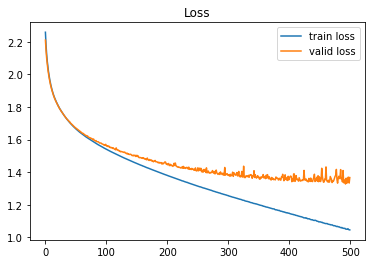

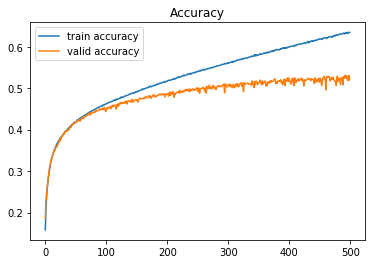

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()